# Conspiracy Theories

A sample of texts from `r/conspiracy`

In [1]:
import pandas as pd
import numpy as np
from cytoolz import *

from collections import defaultdict

import matplotlib.pyplot as plt


%matplotlib inline
pd.set_option('display.max_colwidth', 200)

In [74]:
from sklearn.feature_extraction.text import *
from sklearn.cluster import *
from sklearn.metrics import *
from sklearn.metrics.pairwise import *
from sklearn.neighbors import *

from scipy.cluster.hierarchy import *
from scipy.spatial.distance import *

In [3]:
posts = pd.read_msgpack('reddit-ner.dat')

## Make term-term matrix

In [154]:
def get_names(ents):
    return [n for n,t in ents if n.strip()!='' and t in ['PERSON','ORG','GPE','FACILITY']]

In [155]:
V = CountVectorizer(analyzer=get_names, min_df=5, binary=True)
dtm = V.fit_transform(posts)

In [156]:
dtm

<390034x53282 sparse matrix of type '<class 'numpy.int64'>'
	with 2761182 stored elements in Compressed Sparse Row format>

In [157]:
ttm = dtm.T.dot(dtm)
freq = ttm.diagonal()

In [158]:
ttm

<53282x53282 sparse matrix of type '<class 'numpy.int64'>'
	with 44884560 stored elements in Compressed Sparse Column format>

In [159]:
top = freq.argsort()[-250:]
ttm2 = ttm[top]
names = [V.get_feature_names()[i] for i in top]

In [160]:
ttm2

<250x53282 sparse matrix of type '<class 'numpy.int64'>'
	with 5358208 stored elements in Compressed Sparse Column format>

## Clustering

In [161]:
D = pairwise_distances(ttm2, metric='cosine')
link = linkage(squareform(D), 'ward')

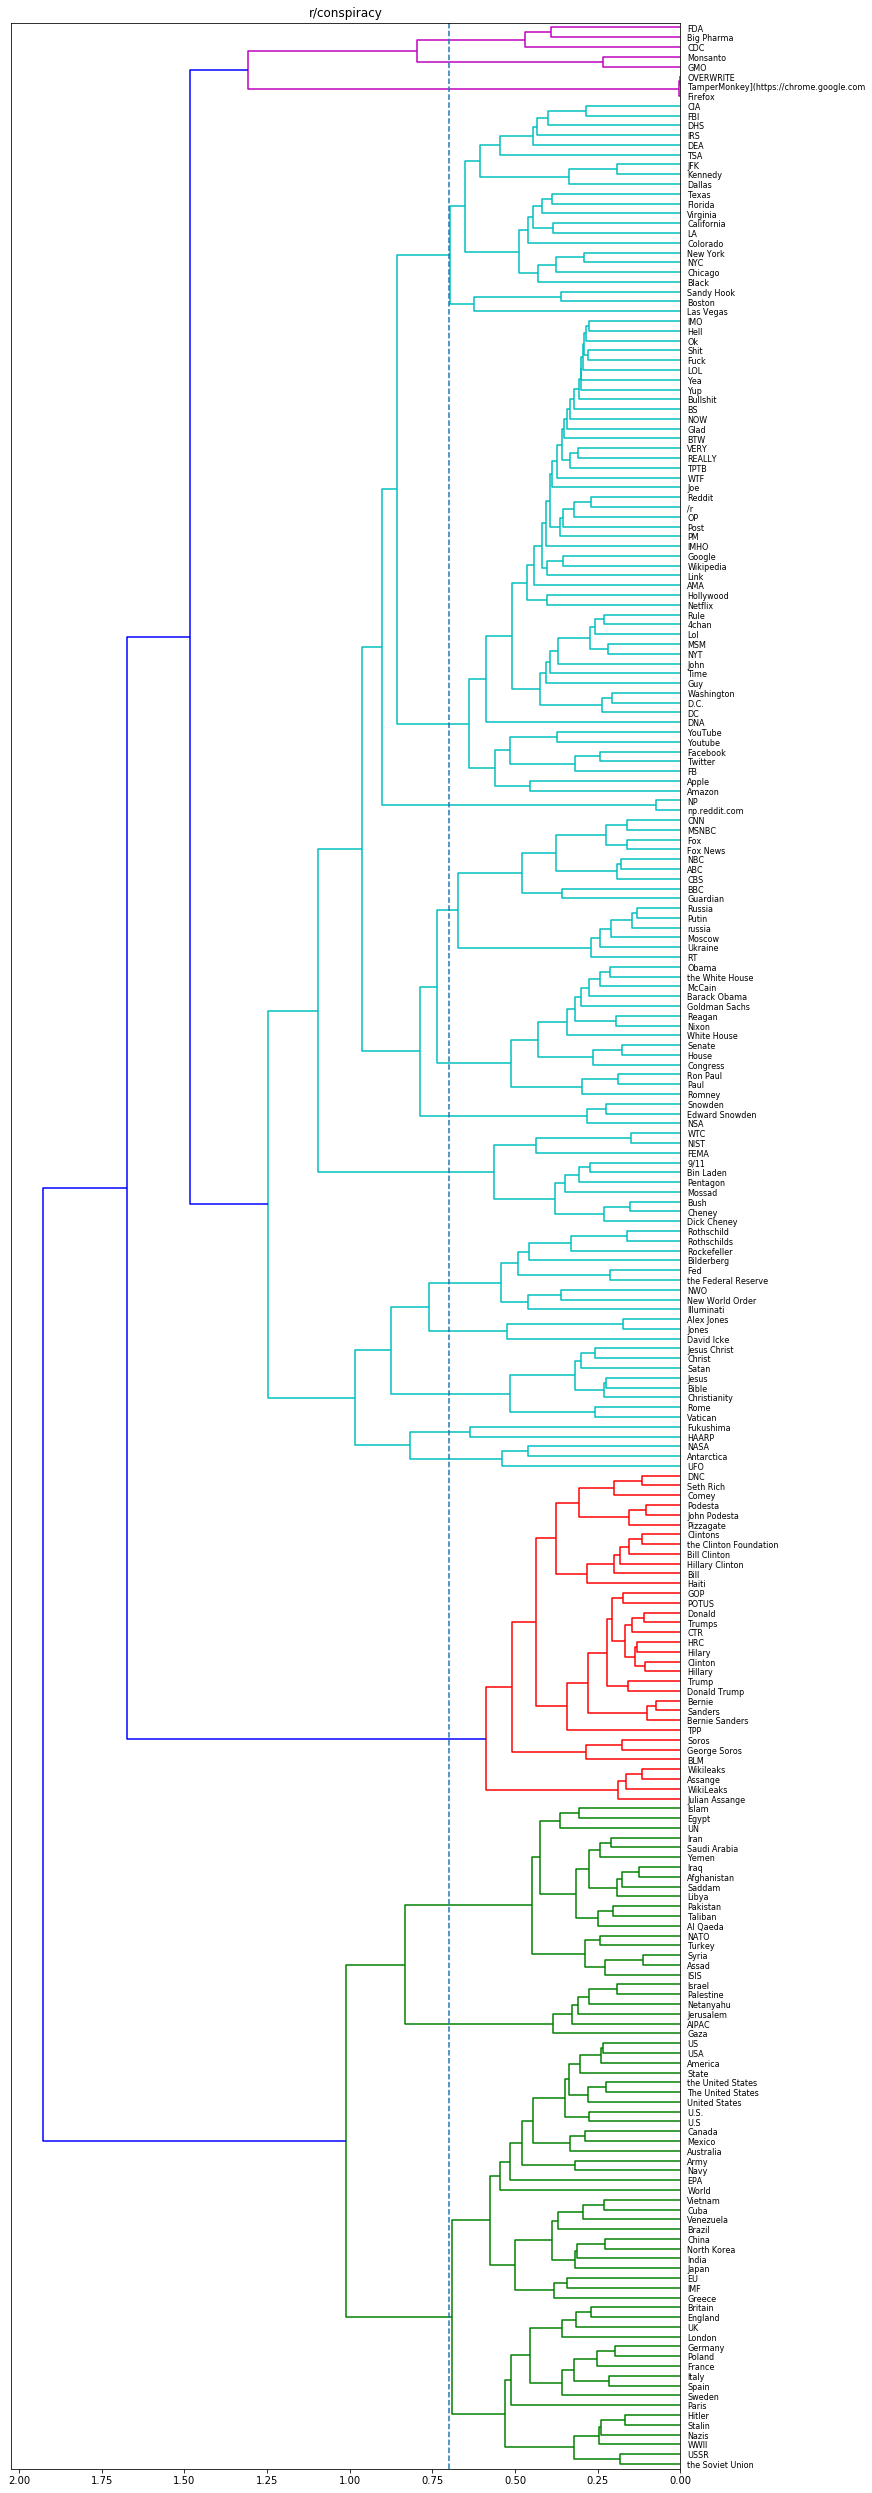

In [162]:
plt.rcParams['figure.figsize']= '12,45'
dendrogram(link, labels=names, orientation='left', leaf_font_size=8)
plt.title('r/conspiracy')
plt.axvline(x=0.7,ls='--')
plt.show()

In [163]:
clusters = defaultdict(set)
for c,n in zip(cut_tree(link,height=0.7), names):
    clusters[c[0]].add(n)

for n in clusters.values():
    print(', '.join(sorted(n)))
    print()

Bilderberg, Fed, Illuminati, NWO, New World Order, Rockefeller, Rothschild, Rothschilds, the Federal Reserve

/r, 4chan, AMA, Amazon, Apple, BS, BTW, Bullshit, D.C., DC, DNA, FB, Facebook, Fuck, Glad, Google, Guy, Hell, Hollywood, IMHO, IMO, Joe, John, LOL, Link, Lol, MSM, NOW, NYT, Netflix, OP, Ok, PM, Post, REALLY, Reddit, Rule, Shit, TPTB, Time, Twitter, VERY, WTF, Washington, Wikipedia, Yea, YouTube, Youtube, Yup

Assange, BLM, Bernie, Bernie Sanders, Bill, Bill Clinton, CTR, Clinton, Clintons, Comey, DNC, Donald, Donald Trump, GOP, George Soros, HRC, Haiti, Hilary, Hillary, Hillary Clinton, John Podesta, Julian Assange, POTUS, Pizzagate, Podesta, Sanders, Seth Rich, Soros, TPP, Trump, Trumps, WikiLeaks, Wikileaks, the Clinton Foundation

Afghanistan, Al Qaeda, Assad, Egypt, ISIS, Iran, Iraq, Islam, Libya, NATO, Pakistan, Saddam, Saudi Arabia, Syria, Taliban, Turkey, UN, Yemen

America, Army, Australia, Brazil, Britain, Canada, China, Cuba, EPA, EU, England, France, Germany, Greece

----

In [175]:
neighbors = NearestNeighbors(metric='cosine').fit(ttm)

In [176]:
def get_neighbors(name, k=10):
    _, terms = neighbors.kneighbors(ttm[V.vocabulary_[name]], n_neighbors=k)
    return [V.get_feature_names()[t] for t in terms[0]]

In [177]:
get_neighbors('NASA')

['NASA',
 'Apollo',
 'ISS',
 'Nasa',
 'Van Allen',
 'the Van Allen',
 'ESA',
 'Moon',
 'SpaceX',
 'Mars']

In [178]:
get_neighbors('JFK')

['JFK',
 'Kennedy',
 'LBJ',
 'Oswald',
 'Allen Dulles',
 'Dulles',
 'RFK',
 "Rich Man's",
 'the Warren Commission',
 'Jfk']

------

In [130]:
z = neighbors.kneighbors_graph(ttm2)

In [133]:
z[1]


<1x55293 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>